### API Ecobici

In [1]:
import pandas as pd 
import datetime 
import os

import json
import requests


In [2]:
# client_id = 'xxxxxxxxx'
# client_secret = 'yyyyyyyyyy'

---

Revisar documentación de ecobici

Consultar la siguiente liga para obtener el access token

In [3]:
#https://pubsbapi-latam.smartbike.com/oauth/v2/token?client_id=xxxxxxx&client_secret=yyyyyyy&grant_type=client_credentials

Regresará la siguiente cadena con el token de acceso. Usarlo para consultar

{"access_token":"zzzzzzzzz","expires_in":3600,"token_type":"bearer","scope":null,"refresh_token":"zzzzzzzzz"}

El token tiene una duración de 1 hr.

In [4]:
#token = 'NDg4YjkwNDg5ZDIwODU3Yzk2NWZkZjc4MTEzZDBjYjU2NGJlYTZkZGRmYjI5MmQzYjEwNDU4MjM0YmNkMjIyMA'

---

In [5]:
url0 = 'https://pubsbapi-latam.smartbike.com/oauth/v2/token?client_id=' + client_id + '&client_secret=' + client_secret + '&grant_type=client_credentials'

In [6]:
url0

'https://pubsbapi-latam.smartbike.com/oauth/v2/token?client_id=2439_2xrz9y3qf2kgoc8s8w0o8o44wg08osc4s00ocsw0cwgwo0wk4k&client_secret=56s1i488mhc8kg4scc0cwkgkk0gsw4oswggcws4scoscos4k0g&grant_type=client_credentials'

In [7]:
response_token = requests.get(url0)

In [8]:
response_token.json()

{'access_token': 'OTY4YmViY2IzNDJiN2ZmMzBjMzdiOGM3OGQ5MGE0ODVjYjdmMjI3NjA4YzE0MWFjNmVhMzU3Zjk5YjMzMjdjNw',
 'expires_in': 3600,
 'token_type': 'bearer',
 'scope': None,
 'refresh_token': 'YjY0MjExN2JmYjJjMGYwMDI4ZWFlOGM1MjA5NDU2NzQ2OTNhZjcwMTJhYTkzOWZmMDdlY2MzZDE0OWUxODMxZg'}

In [9]:
response_token.json().keys()

dict_keys(['access_token', 'expires_in', 'token_type', 'scope', 'refresh_token'])

In [10]:
token = response_token.json()['access_token']
token

'OTY4YmViY2IzNDJiN2ZmMzBjMzdiOGM3OGQ5MGE0ODVjYjdmMjI3NjA4YzE0MWFjNmVhMzU3Zjk5YjMzMjdjNw'

---

**Obtener listado de estaciones disponibles**

In [11]:
#help(requests.get)

Agregar el token dentro de la cadena

In [12]:
url1 = 'https://pubsbapi-latam.smartbike.com/api/v1/stations.json?access_token=' + token 

In [13]:
response_listado_estaciones = requests.get(url1)

inspeccionar los datos

In [14]:
type(response_listado_estaciones.text)

str

In [15]:
type(response_listado_estaciones.json())

dict

Revisar las llaves del diccionario

In [16]:
response_listado_estaciones.json().keys()

dict_keys(['stations'])

In [17]:
len(response_listado_estaciones.json()['stations'])

310

In [18]:
response_listado_estaciones.json()['stations'][0].keys()

dict_keys(['id', 'name', 'address', 'addressNumber', 'zipCode', 'districtCode', 'districtName', 'altitude', 'nearbyStations', 'location', 'stationType'])

In [19]:
# response_listado_estaciones.text

In [20]:
# Inspeccionar los datos
# print(json.dumps(response_listado_estaciones.json(), indent = 4))

Así se ve el resultado de la línea anterior de código. No se ejecutó porque el resultado es muy extenso.

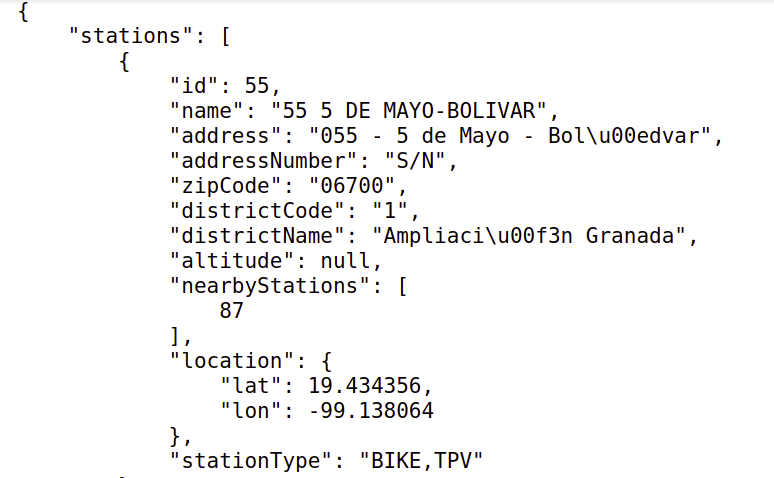

**obtener disponibilidad de estaciones**

Guardar en un objeto la fecha y hr del sistema para tener identificada la hr de consulta

In [21]:
fecha_actual = datetime.date.today()
now = datetime.datetime.now()

In [22]:
anio = fecha_actual.isocalendar()[0]
semana = fecha_actual.isocalendar()[1]

In [25]:
print(semana)

40


In [23]:
mes = now.month
dia = now.day

hora = now.hour
minuto = now.minute
segundo = now.second

In [24]:
print(now)

2022-10-08 13:00:50.974694


Definir url de consulta

In [26]:
#url2 = 'https://pubsbapi-latam.smartbike.com/api/v1/stations/status.json?access_token=NDg4YjkwNDg5ZDIwODU3Yzk2NWZkZjc4MTEzZDBjYjU2NGJlYTZkZGRmYjI5MmQzYjEwNDU4MjM0YmNkMjIyMA'
url2 = 'https://pubsbapi-latam.smartbike.com/api/v1/stations/status.json?access_token=' + token

In [27]:
response_disponibilidad_estaciones = requests.get(url2)

Inspeccionar los datos

In [28]:
response_disponibilidad_estaciones.json().keys()

dict_keys(['stationsStatus'])

In [29]:
len(response_disponibilidad_estaciones.json()['stationsStatus'])

310

In [30]:
response_disponibilidad_estaciones.json()['stationsStatus'][0].keys()

dict_keys(['id', 'status', 'availability'])

In [31]:
# Formato amigable para el lector
# print(json.dumps(response_disponibilidad_estaciones.json(), indent = 4))

Así se ve el resultado de la línea anterior de código. No se ejecutó porque el resultado es muy extenso.

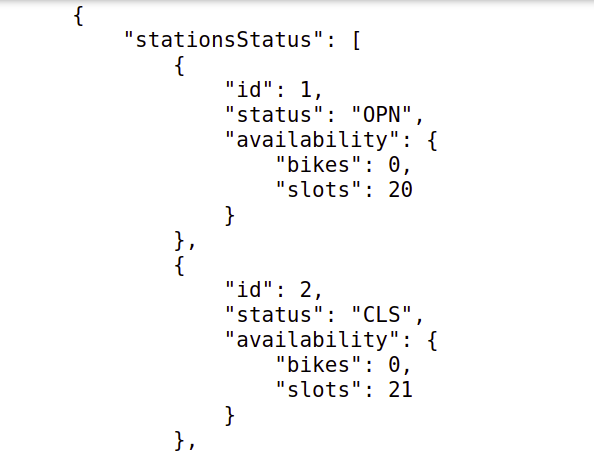

**Guardar las consultas**

In [32]:
os.getcwd()

'/home/leonardo/Documentos/Acatlan/Repositorios/datos_masivos_II_2022/datos/Ecobici'

Listado de estaciones

In [33]:
file1 = "datos/listado_estaciones_ecobici_" + str(anio) + "_semana_" + str(semana) + ".json"
file1

'datos/listado_estaciones_ecobici_2022_semana_40.json'

In [34]:
out_file1 = open(file1, "w")    
json.dump(response_listado_estaciones.json(), out_file1, indent = 4)  
out_file1.close()  

Disponibilidad

In [35]:
file2 = "datos/disponibilidad_estaciones_ecobici_anio" + str(anio) + "_mes" + str(mes) + "_dia" + str(dia) + "_hr" + str(hora) + "_min" + str(minuto) + ".json"
file2

'datos/disponibilidad_estaciones_ecobici_anio2022_mes10_dia8_hr13_min0.json'

In [36]:
out_file2 = open(file2, "w")    
json.dump(response_disponibilidad_estaciones.json(), out_file2, indent = 4)  
out_file2.close()  

---

**Estructurar los datos en formato tabla**

In [37]:
response_listado_estaciones.json()['stations'][0].keys()

dict_keys(['id', 'name', 'address', 'addressNumber', 'zipCode', 'districtCode', 'districtName', 'altitude', 'nearbyStations', 'location', 'stationType'])

In [38]:
lista_ids = []
lista_names = []
lista_address = []
lista_addressNumber = []
lista_zipCode = []
lista_districtCode = []
lista_districtName = []
lista_altitude = []
lista_nearbyStations = []
lista_stationType = []
lista_lat = []
lista_lon = []


for item in response_listado_estaciones.json()['stations']:
    lista_ids.append(item['id'])
    lista_names.append(item['name'])
    lista_address.append(item['address'])
    lista_addressNumber.append(item['addressNumber'])
    lista_zipCode.append(item['zipCode'])
    lista_districtCode.append(item['districtCode'])
    lista_districtName.append(item['districtName'])
    lista_altitude.append(item['altitude'])
    lista_nearbyStations.append(item['nearbyStations'])
    lista_stationType.append(item['stationType'])
    lista_lat.append(item['location']['lat'])
    lista_lon.append(item['location']['lon'])

In [39]:
datos1 = pd.DataFrame()
datos1['id'] = lista_ids
datos1['name'] = lista_names
datos1['address'] = lista_address
datos1['addressNumber'] = lista_addressNumber
datos1['zipCode'] = lista_zipCode
datos1['districtCode'] = lista_districtCode
datos1['districtName'] = lista_districtName
datos1['altitude'] = lista_altitude
datos1['nearbyStations'] = lista_nearbyStations
datos1['stationType'] = lista_stationType
datos1['lat'] = lista_lat
datos1['lon'] = lista_lon

**Importante**. Los valores de longitud y latitud son coordenadas de las cicloestaciones basadas en el Sistema Geodésico Mundial (WGS84), mientras que el sistema que usa Google Maps utiliza la proyección CRS = 4326 
// CRS : Sistema de Referencia de Coordenadas

In [40]:
datos1.head()

,id,name,address,addressNumber,zipCode,districtCode,districtName,altitude,nearbyStations,stationType,lat,lon
0,55,55 5 DE MAYO-BOLIVAR,055 - 5 de Mayo - Bolívar,S/N,06700,1,Ampliación Granada,None,[87],"BIKE,TPV",19.434356,-99.138064
1,124,124 CLAUDIO BERNARD-DR. LICEAGA,124 - Claudio Bernard-Dr. Liceaga,S/N,06500,1,Ampliación Granada,None,[133],BIKE,19.422392,-99.150358
2,154,154 TUXPAN-TLAXCALA,154 - Tuxpan-Tlaxcala,S/N,06100,1,Ampliación Granada,None,[154],"BIKE,TPV",19.406683,-99.167962
3,159,159 HUATABAMPO-EJE 1 PTE. AV. CUAUHTÉMOC,159 - Huatabampo-Eje 1 Pte. Av. Cuauhtémoc,S/N,06760,1,Ampliación Granada,None,[158],BIKE,19.407517,-99.155373
4,350,350 JOSE CLEMENTE OROZCO-CORREGGIO,350 - Jose Clemente Orozco-Correggio,S/N,3710,1,Ampliación Granada,None,[350],BIKE,19.384062,-99.181482


In [41]:
datos1['unos'] = 1

In [42]:
datos1.groupby('stationType').unos.value_counts()

stationType  unos
BIKE         1       229
BIKE,TPV     1        81
Name: unos, dtype: int64

In [43]:
datos1.groupby('districtName').unos.value_counts().sort_values()

districtName                      unos
Lomas de Chapultepec Sección V    1        1
Cuauhtémoc Pensil                 1        1
Irrigación                        1        1
Letran Valle                      1        1
Lomas de Chapultepec Sección III  1        1
Molino del Rey                    1        1
Doctores                          1        1
Ampliación Nápoles                1        1
Residencial Emperadores           1        1
Santa María Nonoalco              1        1
Anáhuac Mariano Escobedo          1        1
Noche Buena                       1        2
General Pedro Maria Anaya         1        2
Ciudad de los Deportes            1        2
Insurgentes San Borja             1        2
Acacias                           1        2
Piedad Narvarte                   1        3
Insurgentes Mixcoac               1        3
Xoco                              1        3
Actipan                           1        3
Tabacalera                        1        4
Bosque de Chapul

In [44]:
datos1.groupby('districtName').unos.value_counts().sum()

310

---

**tabla de disponibilidad**

In [45]:
response_disponibilidad_estaciones.json()['stationsStatus'][0].keys()

dict_keys(['id', 'status', 'availability'])

In [46]:
lista_ids = []
lista_status = []
lista_bikes = []
lista_slots = []
lista_total = []

for item in response_disponibilidad_estaciones.json()['stationsStatus']:
    lista_ids.append(item['id'])
    lista_status.append(item['status'])
    lista_bikes.append(item['availability']['bikes'])
    lista_slots.append(item['availability']['slots'])
    # Crear la variable de total
    lista_total.append(item['availability']['bikes'] + item['availability']['slots'])
    

Status:
    - 'OPN': Estaciones abiertas
    - 'CLS': Estaciones cerradas
        
Availability:
    - 'bikes': número de bicicletas disponibles
    - 'slots': número de slots sin bicicletas

In [47]:
datos2 = pd.DataFrame()
datos2['id'] = lista_ids
datos2['status'] = lista_status
datos2['bikes'] = lista_bikes
datos2['slots'] = lista_slots
datos2['total'] = lista_total

In [48]:
datos2.head()

,id,status,bikes,slots,total
0,1,OPN,0,23,23
1,3,CLS,0,34,34
2,4,OPN,6,9,15
3,5,CLS,0,11,11
4,6,CLS,0,15,15


Breve summary

In [49]:
datos2.describe()

,id,bikes,slots,total
count,310.000000,310.000000,310.000000,310.000000
mean,222.041935,2.925806,21.422581,24.348387
std,134.766614,7.106060,9.783025,7.915487
min,1.000000,0.000000,0.000000,0.000000
25%,115.250000,0.000000,15.000000,20.000000
50%,216.000000,0.000000,23.000000,24.000000
75%,320.750000,1.000000,29.000000,30.000000
max,480.000000,35.000000,36.000000,36.000000


In [50]:
datos2.groupby('status').describe()

id                                                           bikes  \
        count        mean         std  min    25%    50%    75%    max  count   
status                                                                          
CLS     183.0  250.387978  132.490129  3.0  151.5  279.0  355.5  477.0  183.0   
OPN     127.0  181.196850  127.814104  1.0   71.0  187.0  243.0  480.0  127.0   

                  ... slots        total                                  \
            mean  ...   75%   max  count       mean       std  min   25%   
status            ...                                                      
CLS     0.256831  ...  30.0  36.0  183.0  24.016393  8.376757  0.0  20.0   
OPN     6.771654  ...  26.0  36.0  127.0  24.826772  7.204600  2.0  19.5   

                          
         50%   75%   max  
status                    
CLS     24.0  30.0  36.0  
OPN     24.0  31.0  36.0  

[2 rows x 32 columns]

Agregar histograma o boxplot para estaciones abiertas

Total de bicis disponibles

In [51]:
datos2.groupby('status').bikes.sum()

status
CLS     47
OPN    860
Name: bikes, dtype: int64

Total de slots disponibles

In [52]:
datos2.groupby('status').slots.sum()

status
CLS    4348
OPN    2293
Name: slots, dtype: int64

promedio de disponibilidad de bicis por cicloestacion

In [53]:
datos2.groupby('status').bikes.mean()

status
CLS    0.256831
OPN    6.771654
Name: bikes, dtype: float64

Promedio de slots por cicloestacion

In [54]:
datos2.groupby('status').slots.mean()

status
CLS    23.759563
OPN    18.055118
Name: slots, dtype: float64

In [55]:
datos2.groupby('status').total.mean()

status
CLS    24.016393
OPN    24.826772
Name: total, dtype: float64

In [59]:
#datos2.groupby('status').bikes.value_counts()

In [60]:
#datos2.groupby('status').slots.value_counts()

In [61]:
#datos2.groupby('status').total.value_counts()

**Crear tabla con relación entre estaciones utilizando la variable nearby stations**

> by Gustavo Álvarez Hernández

In [62]:
lista_estacion1 = []
lista_estacion2 = []

for item in response_listado_estaciones.json()['stations']:
    for nearby in item['nearbyStations']:
        lista_estacion1.append(item['id'])
        lista_estacion2.append(nearby)

In [63]:
datos3 = pd.DataFrame()
datos3['estacion1'] = lista_estacion1
datos3['estacion2'] = lista_estacion2

In [64]:
datos3.head(20)

,estacion1,estacion2
0,55,87
1,124,133
2,154,154
3,159,158
4,350,350
5,463,197
6,463,242
7,463,462
8,470,471
9,471,470


Guardar los datos

In [65]:
file_name = "datos/relacion_estaciones_ecobici_" + str(anio) + "_semana_" + str(semana) + ".csv"
file_name

'datos/relacion_estaciones_ecobici_2022_semana_40.csv'

In [66]:
datos3.to_csv(file_name, index = False)

---

Compobar que los archivos guardados se pueden leer

In [87]:
with open('/home/leonardo/Documentos/Ecobici/datos/listado_estaciones_ecobici_2022_semana_37.json') as archivo:
    datos1 = json.load(archivo)

In [88]:
type(datos1)

dict

In [67]:
#datos2.groupby('status').slots.mean()datos1

In [90]:
with open('/home/leonardo/Documentos/Ecobici/datos/disponibilidad_estaciones_ecobici_anio2022_mes9_dia16_hr21_min35.json') as archivo:
    datos2 = json.load(archivo)

In [68]:
#datos2

Leer con pandas

In [75]:
import pandas as pd

In [92]:
datos1 = pd.read_json('/home/leonardo/Documentos/Ecobici/datos/listado_estaciones_ecobici_2022_semana_37.json')

In [93]:
type(datos1)

pandas.core.frame.DataFrame

In [94]:
datos1.head()

,stations
0,"{'id': 55, 'name': '55 5 DE MAYO-BOLIVAR', 'ad..."
1,"{'id': 124, 'name': '124 CLAUDIO BERNARD-DR. L..."
2,"{'id': 159, 'name': '159 HUATABAMPO-EJE 1 PTE...."
3,"{'id': 241, 'name': 'E241 EJERCITO NAL-JUAN VA..."
4,"{'id': 243, 'name': '243 MIGUEL DE CERVANTES S..."


In [95]:
datos2 = pd.read_json('/home/leonardo/Documentos/Ecobici/datos/disponibilidad_estaciones_ecobici_anio2022_mes9_dia16_hr21_min35.json')

In [96]:
type(datos2)

pandas.core.frame.DataFrame

In [97]:
datos2.head(json.loadsjson.loadsjson.loads)

,stationsStatus
0,"{'id': 1, 'status': 'OPN', 'availability': {'b..."
1,"{'id': 2, 'status': 'OPN', 'availability': {'b..."
2,"{'id': 3, 'status': 'CLS', 'availability': {'b..."
3,"{'id': 4, 'status': 'OPN', 'availability': {'b..."
4,"{'id': 5, 'status': 'CLS', 'availability': {'b..."
